# NOTE : This is a Python notebook !!! 
We check numerically that the state evolution overlaps correspond to the numerics

In [51]:
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import uncertaintyutils.data as data
import uncertaintyutils.erm as erm
import uncertaintyutils.utility as utility

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Computation with constant lambda

In [23]:
lambda_ = 0.001

const_lambda_input_files = {
    "bootstrap_bootstrap" : f"../data/bootstrap_bootstrap_overlaps_lambda={lambda_}.json",
    "bootstrap_full"      : f"../data/bootstrap_full_overlaps_lambda={lambda_}.json",
    "full_full"           : f"../data/full_full_overlaps_lambda={lambda_}.json",
    "y_resampling"        : f"../data/y_resampling_overlaps_lambda={lambda_}.json",
}

const_lambda_overlaps = {}

for key in const_lambda_input_files:
    with open(const_lambda_input_files[key], "r") as f:
        const_lambda_overlaps[key] = json.load(f)

In [39]:
np.random.seed(0)

dimension = 1000
alpha_range = np.arange(0.5, 5.0, 0.25)
nalpha = len(alpha_range)

bootstrap_full_correlation = np.zeros(nalpha)
bootstrap_bootstrap_correlation = np.zeros(nalpha)
full_full_correlation = np.zeros(nalpha)

for i, alpha in tqdm(enumerate(alpha_range)):
    # run the bootstrap twice and erm on the full dataset once, compare with the overlaps
    n = int(dimension * alpha)
    wstar, x, y = data.sample_data(n, dimension, "logit", noise_std=0.0)
    xprime, yprime = data.sample_data_from_teacher(n, wstar, "logit", 0.0)
    w_poisson = erm.bootstrap_logistic_regression.poisson_logistic_classification(x, y, lambda_, n_resamples=2)
    werm      = erm.logistic_regression.solve_logistic_regression(x, y, lambda_)
    wermprime = erm.logistic_regression.solve_logistic_regression(xprime, yprime, lambda_)

    bootstrap_full_correlation[i] = w_poisson[0] @ werm / dimension
    bootstrap_bootstrap_correlation[i] = w_poisson[0] @ w_poisson[1] / dimension
    full_full_correlation[i] = wermprime @ werm / dimension

0it [00:00, ?it/s]

18it [04:37, 15.43s/it]


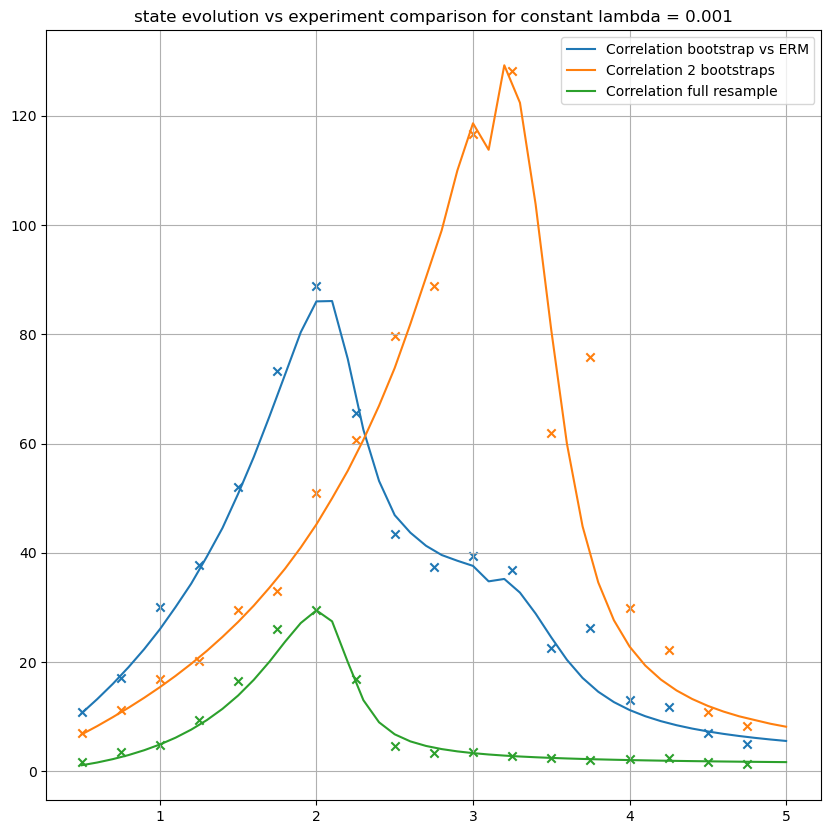

In [42]:
plt.figure(figsize=(10, 10))

plt.plot(const_lambda_overlaps["bootstrap_full"]["alpha"], const_lambda_overlaps["bootstrap_full"]["q_off_diag"], label="Correlation bootstrap vs ERM")
plt.plot(const_lambda_overlaps["bootstrap_bootstrap"]["alpha"], const_lambda_overlaps["bootstrap_bootstrap"]["q_off_diag"], label="Correlation 2 bootstraps")
plt.plot(const_lambda_overlaps["full_full"]["alpha"], const_lambda_overlaps["full_full"]["q_off_diag"], label="Correlation full resample")

plt.scatter(alpha_range, bootstrap_full_correlation, marker='x')
plt.scatter(alpha_range, bootstrap_bootstrap_correlation,  marker='x')
plt.scatter(alpha_range, full_full_correlation, marker='x')

plt.legend()
plt.grid()
plt.title(f"state evolution vs experiment comparison for constant lambda = {lambda_}")
plt.show()

### Lambda error

In [52]:
lambda_error_file = "../data/lambda_error.json"

with open(lambda_error_file, "r") as f:
    lambda_error_data = json.load(f)
    lambda_error_alpha  = lambda_error_data["alpha"]
    lambda_error_lambda = lambda_error_data["lambda_error"]

lambda_error_input_files = {
    "bootstrap_bootstrap" : f"../data/bootstrap_bootstrap_overlaps_lambda_error.json",
    "bootstrap_full"      : f"../data/bootstrap_full_overlaps_lambda_error.json",
    "full_full"           : f"../data/full_full_overlaps_lambda_error.json",
    "y_resampling"        : f"../data/y_resampling_overlaps_lambda_error.json",
}

lambda_error_overlaps = {}

for key in lambda_error_input_files:
    with open(lambda_error_input_files[key], "r") as f:
        lambda_error_overlaps[key] = json.load(f)

In [49]:
dimension = 200

lambda_error_nalpha = len(lambda_error_alpha)

lambda_error_bootstrap_full_correlation = np.zeros(lambda_error_nalpha)
lambda_error_bootstrap_bootstrap_correlation = np.zeros(lambda_error_nalpha)
lambda_error_full_full_correlation = np.zeros(lambda_error_nalpha)

for i, (alpha, l) in tqdm(enumerate(zip(lambda_error_alpha, lambda_error_lambda))):
    # run the bootstrap twice and erm on the full dataset once, compare with the overlaps
    n = int(dimension * alpha)
    wstar, x, y = data.sample_data(n, dimension, "logit", noise_std = 0.0)
    xprime, yprime = data.sample_data_from_teacher(n, wstar, "logit", 0.0)
    
    w_poisson = erm.bootstrap_logistic_regression.poisson_logistic_classification(x, y, l, n_resamples=2)
    werm      = erm.logistic_regression.solve_logistic_regression(x, y, l)
    wermprime = erm.logistic_regression.solve_logistic_regression(xprime, yprime, l)

    lambda_error_bootstrap_full_correlation[i] = w_poisson[0] @ werm / dimension
    lambda_error_bootstrap_bootstrap_correlation[i] = w_poisson[0] @ w_poisson[1] / dimension
    lambda_error_full_full_correlation[i] = wermprime @ werm / dimension

45it [01:04,  1.43s/it]


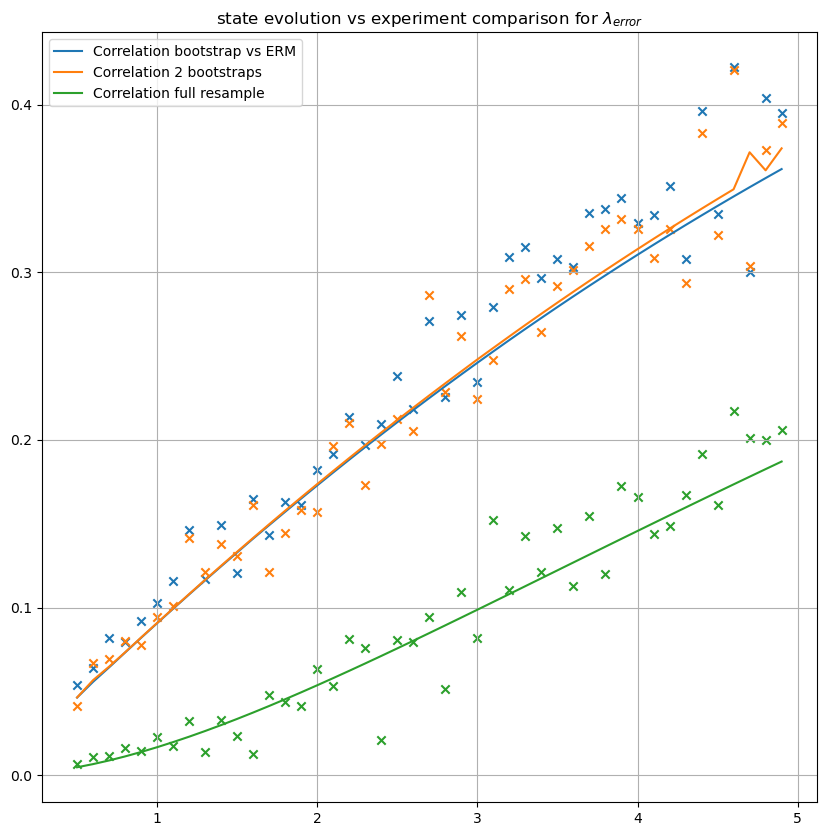

In [55]:
plt.figure(figsize=(10, 10))

plt.plot(lambda_error_overlaps["bootstrap_full"]["alpha"], lambda_error_overlaps["bootstrap_full"]["q_off_diag"], label="Correlation bootstrap vs ERM")
plt.plot(lambda_error_overlaps["bootstrap_bootstrap"]["alpha"], lambda_error_overlaps["bootstrap_bootstrap"]["q_off_diag"], label="Correlation 2 bootstraps")
plt.plot(lambda_error_overlaps["full_full"]["alpha"], lambda_error_overlaps["full_full"]["q_off_diag"], label="Correlation full resample")

plt.scatter(lambda_error_alpha, lambda_error_bootstrap_full_correlation, marker='x')
plt.scatter(lambda_error_alpha, lambda_error_bootstrap_bootstrap_correlation,  marker='x')
plt.scatter(lambda_error_alpha, lambda_error_full_full_correlation, marker='x')

plt.legend()
plt.grid()
plt.title("state evolution vs experiment comparison for $\\lambda_{error}$")
plt.show()

### Lambda loss

In [58]:
lambda_loss_file = "../data/lambda_loss.json"

with open(lambda_loss_file, "r") as f:
    lambda_loss_data = json.load(f)
    lambda_loss_alpha  = lambda_loss_data["alpha"]
    lambda_loss_lambda = lambda_loss_data["lambda_loss"]

lambda_loss_input_files = {
    "bootstrap_bootstrap" : f"../data/bootstrap_bootstrap_overlaps_lambda_loss.json",
    "bootstrap_full"      : f"../data/bootstrap_full_overlaps_lambda_loss.json",
    "full_full"           : f"../data/full_full_overlaps_lambda_loss.json",
    "y_resampling"        : f"../data/y_resampling_overlaps_lambda_loss.json",
}

lambda_loss_overlaps = {}

for key in lambda_loss_input_files:
    with open(lambda_loss_input_files[key], "r") as f:
        lambda_loss_overlaps[key] = json.load(f)

In [61]:
dimension = 500

lambda_loss_nalpha = len(lambda_loss_alpha)

lambda_loss_bootstrap_full_correlation = np.zeros(lambda_loss_nalpha)
lambda_loss_bootstrap_bootstrap_correlation = np.zeros(lambda_loss_nalpha)
lambda_loss_full_full_correlation = np.zeros(lambda_loss_nalpha)

for i, (alpha, l) in tqdm(enumerate(zip(lambda_loss_alpha, lambda_loss_lambda))):
    # run the bootstrap twice and erm on the full dataset once, compare with the overlaps
    n = int(dimension * alpha)
    wstar, x, y = data.sample_data(n, dimension, "logit", noise_std = 0.0)
    xprime, yprime = data.sample_data_from_teacher(n, wstar, "logit", 0.0)
    
    w_poisson = erm.bootstrap_logistic_regression.poisson_logistic_classification(x, y, l, n_resamples=2)
    werm      = erm.logistic_regression.solve_logistic_regression(x, y, l)
    wermprime = erm.logistic_regression.solve_logistic_regression(xprime, yprime, l)

    lambda_loss_bootstrap_full_correlation[i] = w_poisson[0] @ werm / dimension
    lambda_loss_bootstrap_bootstrap_correlation[i] = w_poisson[0] @ w_poisson[1] / dimension
    lambda_loss_full_full_correlation[i] = wermprime @ werm / dimension

0it [00:00, ?it/s]

45it [03:11,  4.26s/it]


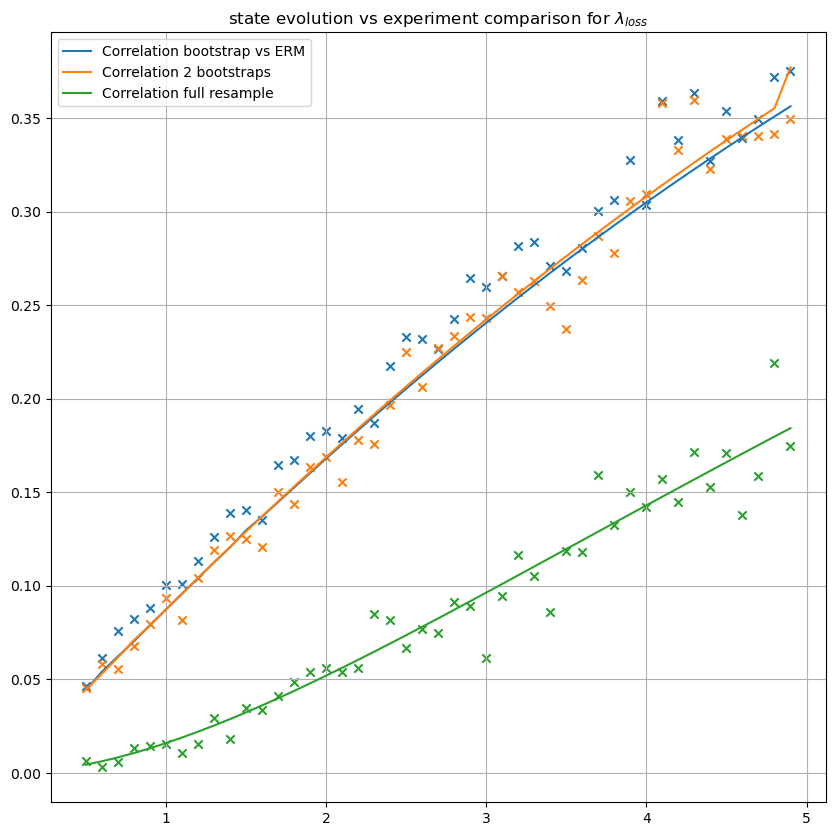

In [62]:
plt.figure(figsize=(10, 10))

plt.plot(lambda_loss_overlaps["bootstrap_full"]["alpha"], lambda_loss_overlaps["bootstrap_full"]["q_off_diag"], label="Correlation bootstrap vs ERM")
plt.plot(lambda_loss_overlaps["bootstrap_bootstrap"]["alpha"], lambda_loss_overlaps["bootstrap_bootstrap"]["q_off_diag"], label="Correlation 2 bootstraps")
plt.plot(lambda_loss_overlaps["full_full"]["alpha"], lambda_loss_overlaps["full_full"]["q_off_diag"], label="Correlation full resample")

plt.scatter(lambda_loss_alpha, lambda_loss_bootstrap_full_correlation, marker='x')
plt.scatter(lambda_loss_alpha, lambda_loss_bootstrap_bootstrap_correlation,  marker='x')
plt.scatter(lambda_loss_alpha, lambda_loss_full_full_correlation, marker='x')

plt.legend()
plt.grid()
plt.title("state evolution vs experiment comparison for $\\lambda_{loss}$")
plt.show()